# 18COC102 -  Advanced Artificial Intelligence Systems - Coursework

<hr>
<p style='color:red'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Experiment B1</p>
<hr>


In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,torch,torchvision

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
CPython 3.6.7
IPython 7.2.0

numpy 1.15.4
torch 0.4.1
torchvision 0.2.1


In [2]:
# import all dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import os
from tensorboardX import SummaryWriter

In [3]:
#implement the network by myself#

class LeNet(nn.Module):
    
    def __init__(self):
        
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1  = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2  = nn.MaxPool2d(2, 2)
        
        self.fc1   = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2   = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3   = nn.Linear(84, 10)

        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(-1, 16 * 5 * 5)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        
        return x

In [4]:
# parameters
learning_rate=0.001
batch_size=100
epoch=800
workers=2

In [5]:
# set GPU 
device = torch.device("cuda:0")
# set Netwrok
net = LeNet()
net = net.to(device)
# set optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# set loss function
loss = nn.CrossEntropyLoss()

In [6]:
# dataloader refer source [2]

# load training dataset
trainingset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                           transform=transforms.ToTensor())

trainingloader = torch.utils.data.DataLoader(trainingset, batch_size=batch_size,shuffle=True, 
                                             num_workers=workers)
# load testing dataset
testingset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

testingloader = torch.utils.data.DataLoader(testingset, batch_size=batch_size,
                                         shuffle=False, num_workers=workers)

#end of source [2]
#source [2] https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Files already downloaded and verified
Files already downloaded and verified


In [7]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start training : set net to train model
net.train()

# make two arrays for saving matplotlib data
train_loss = []
train_accu = []
accuracy = 0

# get TersorBoard writer object
writer = SummaryWriter(log_dir='Training')

# Training process
timestart = time.time()
for epoch in range(0,epoch):
    
    # initialize loss,total,correct
    loss_value = 0.0
    total = 0
    correct = 0
    accuracy = 0
    
    # do iteration (total number of training images / batch size) times
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)

        # make gradients to 0
        optimizer.zero_grad()

        # forward step
        outputs = net(inputs)
        
        # compute the loss
        l = loss(outputs, labels)
        
        # backward step
        l.backward()
        
        # optimize step
        optimizer.step()

        # compute loss
        loss_value += l.item()
        
        # save to array in oder to output loss image at the end
        train_loss.append(l.item())
        
        # write to tensorboard file
        writer.add_scalars('/GroupB/Loss', {'B1': l.item()}, epoch)

        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
        accuracy = correct / total * 100.0
        
        # save to array in oder to output accuracy image at the end
        train_accu.append(accuracy)
        
        # write to tensorboard file
        writer.add_scalars('/GroupB/Accuracy', {'B1': accuracy}, epoch)
        

    loss_epoch = loss_value / (500000/batch_size)
    # output the result of this epoch 
    print('[epoch %d]  Loss: %.4f  Accuracy: %.3f %%' %(epoch, loss_epoch , accuracy))

    
# Finish Training
result_training_accuracy = accuracy
result_training_time = (time.time()-timestart)
print('Finished Training! Training process cost %3f sec' %result_training_time)

[epoch 0]  Loss: 0.1766  Accuracy: 34.024 %
[epoch 1]  Loss: 0.1489  Accuracy: 45.422 %
[epoch 2]  Loss: 0.1388  Accuracy: 49.516 %
[epoch 3]  Loss: 0.1308  Accuracy: 52.826 %
[epoch 4]  Loss: 0.1253  Accuracy: 54.788 %
[epoch 5]  Loss: 0.1203  Accuracy: 56.904 %
[epoch 6]  Loss: 0.1164  Accuracy: 58.220 %
[epoch 7]  Loss: 0.1133  Accuracy: 59.576 %
[epoch 8]  Loss: 0.1097  Accuracy: 60.782 %
[epoch 9]  Loss: 0.1064  Accuracy: 62.024 %
[epoch 10]  Loss: 0.1041  Accuracy: 63.164 %
[epoch 11]  Loss: 0.1014  Accuracy: 64.118 %
[epoch 12]  Loss: 0.0985  Accuracy: 65.096 %
[epoch 13]  Loss: 0.0965  Accuracy: 65.838 %
[epoch 14]  Loss: 0.0942  Accuracy: 66.602 %
[epoch 15]  Loss: 0.0925  Accuracy: 67.384 %
[epoch 16]  Loss: 0.0902  Accuracy: 68.220 %
[epoch 17]  Loss: 0.0882  Accuracy: 69.098 %
[epoch 18]  Loss: 0.0862  Accuracy: 69.602 %
[epoch 19]  Loss: 0.0850  Accuracy: 70.080 %
[epoch 20]  Loss: 0.0834  Accuracy: 70.386 %
[epoch 21]  Loss: 0.0816  Accuracy: 71.332 %
[epoch 22]  Loss: 0.

[epoch 181]  Loss: 0.0178  Accuracy: 93.448 %
[epoch 182]  Loss: 0.0196  Accuracy: 92.888 %
[epoch 183]  Loss: 0.0186  Accuracy: 93.120 %
[epoch 184]  Loss: 0.0176  Accuracy: 93.610 %
[epoch 185]  Loss: 0.0184  Accuracy: 93.240 %
[epoch 186]  Loss: 0.0187  Accuracy: 93.218 %
[epoch 187]  Loss: 0.0183  Accuracy: 93.176 %
[epoch 188]  Loss: 0.0196  Accuracy: 92.694 %
[epoch 189]  Loss: 0.0182  Accuracy: 93.298 %
[epoch 190]  Loss: 0.0185  Accuracy: 93.278 %
[epoch 191]  Loss: 0.0168  Accuracy: 93.750 %
[epoch 192]  Loss: 0.0181  Accuracy: 93.396 %
[epoch 193]  Loss: 0.0182  Accuracy: 93.236 %
[epoch 194]  Loss: 0.0173  Accuracy: 93.612 %
[epoch 195]  Loss: 0.0185  Accuracy: 93.178 %
[epoch 196]  Loss: 0.0172  Accuracy: 93.788 %
[epoch 197]  Loss: 0.0171  Accuracy: 93.924 %
[epoch 198]  Loss: 0.0178  Accuracy: 93.510 %
[epoch 199]  Loss: 0.0180  Accuracy: 93.420 %
[epoch 200]  Loss: 0.0170  Accuracy: 93.786 %
[epoch 201]  Loss: 0.0178  Accuracy: 93.560 %
[epoch 202]  Loss: 0.0177  Accurac

[epoch 360]  Loss: 0.0137  Accuracy: 95.266 %
[epoch 361]  Loss: 0.0110  Accuracy: 96.208 %
[epoch 362]  Loss: 0.0110  Accuracy: 96.150 %
[epoch 363]  Loss: 0.0117  Accuracy: 96.010 %
[epoch 364]  Loss: 0.0114  Accuracy: 95.944 %
[epoch 365]  Loss: 0.0094  Accuracy: 96.642 %
[epoch 366]  Loss: 0.0131  Accuracy: 95.496 %
[epoch 367]  Loss: 0.0133  Accuracy: 95.366 %
[epoch 368]  Loss: 0.0116  Accuracy: 95.930 %
[epoch 369]  Loss: 0.0117  Accuracy: 95.856 %
[epoch 370]  Loss: 0.0126  Accuracy: 95.624 %
[epoch 371]  Loss: 0.0104  Accuracy: 96.348 %
[epoch 372]  Loss: 0.0101  Accuracy: 96.496 %
[epoch 373]  Loss: 0.0127  Accuracy: 95.592 %
[epoch 374]  Loss: 0.0118  Accuracy: 95.882 %
[epoch 375]  Loss: 0.0144  Accuracy: 95.046 %
[epoch 376]  Loss: 0.0119  Accuracy: 95.832 %
[epoch 377]  Loss: 0.0098  Accuracy: 96.542 %
[epoch 378]  Loss: 0.0108  Accuracy: 96.094 %
[epoch 379]  Loss: 0.0127  Accuracy: 95.534 %
[epoch 380]  Loss: 0.0095  Accuracy: 96.614 %
[epoch 381]  Loss: 0.0110  Accurac

[epoch 539]  Loss: 0.0109  Accuracy: 96.322 %
[epoch 540]  Loss: 0.0115  Accuracy: 96.250 %
[epoch 541]  Loss: 0.0091  Accuracy: 96.920 %
[epoch 542]  Loss: 0.0081  Accuracy: 97.156 %
[epoch 543]  Loss: 0.0091  Accuracy: 96.808 %
[epoch 544]  Loss: 0.0137  Accuracy: 95.546 %
[epoch 545]  Loss: 0.0112  Accuracy: 96.282 %
[epoch 546]  Loss: 0.0075  Accuracy: 97.436 %
[epoch 547]  Loss: 0.0095  Accuracy: 96.804 %
[epoch 548]  Loss: 0.0103  Accuracy: 96.510 %
[epoch 549]  Loss: 0.0142  Accuracy: 95.614 %
[epoch 550]  Loss: 0.0074  Accuracy: 97.402 %
[epoch 551]  Loss: 0.0069  Accuracy: 97.798 %
[epoch 552]  Loss: 0.0119  Accuracy: 96.126 %
[epoch 553]  Loss: 0.0094  Accuracy: 96.776 %
[epoch 554]  Loss: 0.0114  Accuracy: 96.352 %
[epoch 555]  Loss: 0.0100  Accuracy: 96.578 %
[epoch 556]  Loss: 0.0087  Accuracy: 97.198 %
[epoch 557]  Loss: 0.0101  Accuracy: 96.582 %
[epoch 558]  Loss: 0.0085  Accuracy: 97.144 %
[epoch 559]  Loss: 0.0114  Accuracy: 96.298 %
[epoch 560]  Loss: 0.0091  Accurac

[epoch 718]  Loss: 0.0115  Accuracy: 96.498 %
[epoch 719]  Loss: 0.0067  Accuracy: 97.720 %
[epoch 720]  Loss: 0.0081  Accuracy: 97.402 %
[epoch 721]  Loss: 0.0084  Accuracy: 97.280 %
[epoch 722]  Loss: 0.0100  Accuracy: 96.912 %
[epoch 723]  Loss: 0.0115  Accuracy: 96.478 %
[epoch 724]  Loss: 0.0093  Accuracy: 97.028 %
[epoch 725]  Loss: 0.0081  Accuracy: 97.278 %
[epoch 726]  Loss: 0.0059  Accuracy: 97.976 %
[epoch 727]  Loss: 0.0129  Accuracy: 96.226 %
[epoch 728]  Loss: 0.0088  Accuracy: 97.116 %
[epoch 729]  Loss: 0.0088  Accuracy: 97.254 %
[epoch 730]  Loss: 0.0099  Accuracy: 96.838 %
[epoch 731]  Loss: 0.0086  Accuracy: 97.228 %
[epoch 732]  Loss: 0.0081  Accuracy: 97.350 %
[epoch 733]  Loss: 0.0075  Accuracy: 97.596 %
[epoch 734]  Loss: 0.0090  Accuracy: 97.086 %
[epoch 735]  Loss: 0.0091  Accuracy: 96.986 %
[epoch 736]  Loss: 0.0103  Accuracy: 96.712 %
[epoch 737]  Loss: 0.0068  Accuracy: 97.724 %
[epoch 738]  Loss: 0.0085  Accuracy: 97.320 %
[epoch 739]  Loss: 0.0104  Accurac

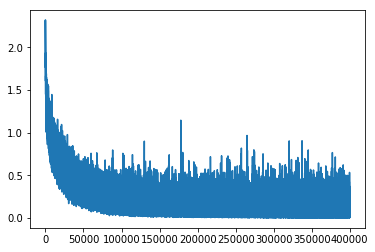

In [8]:
# show the loss
plt.plot(np.arange(len(train_loss)), train_loss)

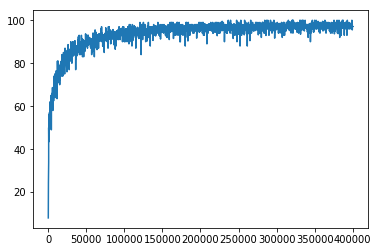

In [9]:
# show the accuracy
plt.plot(np.arange(len(train_accu)), train_accu)

In [10]:
# close the TensorBoard output stream
writer.close()

In [11]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start testing : set net to train model
correct = 0
total = 0

# deactivate the autograd engine
with torch.no_grad():
    
    # do testing iteration
    #for data in testingloader:
        
        # get the input and its label
        #images, labels = data
        #images, labels = images.to(device), labels.to(device)
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # forward step
        outputs = net(inputs)
        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

# Finish Testing
result_testing_accuracy = correct / total * 100.0
print('The accuracy of the network is %.3f %%' % result_testing_accuracy)

The accuracy of the network is 98.428 %


In [12]:
print('[Configuration]')
print('learning rate = %3f' % learning_rate )
print('batch size = %d' % batch_size )
print('epoch = %d' % epoch )
print('')
print('[Expirement Result]')
print('training time = %3f sec' % result_training_time )
print('training accuracy = %.3f %%' %result_training_accuracy )
print('testing accuracy =  %.3f %%' % (100.0 * correct / total))


[Configuration]
learning rate = 0.001000
batch size = 100
epoch = 799

[Expirement Result]
training time = 8768.758210 sec
training accuracy = 97.112 %
testing accuracy =  98.428 %


<b>click <a href='../Main.ipynb'>here</a> to return to Main.ipynb